<a href="https://colab.research.google.com/github/fursuf1/Credit-Card-Fraud-Detection/blob/main/src/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the library required for uploading to and downloading from Colab
!pip install opendatasets
!pip install kaggle

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

In [ ]:
# Import the necessary module requred to upload the json file containing the user's Kaggle username and API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smwares","key":"9d4510dd154cd14320d909c8ea824582"}'}

In [ ]:
# Make the directory necessar to place the Kaggle json credentials file. RUN THIS ONLY ONCE PER SESSION
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the CC data set from Kaggle
od.download("https://www.kaggle.com/datasets/kartik2112/fraud-detection")

100%|██████████| 202M/202M [00:05<00:00, 35.3MB/s]


In [ ]:
# Import data as DataFrames
fraud_test = pd.read_csv('./fraud-detection/fraudTest.csv', index_col=0)
fraud_train = pd.read_csv('./fraud-detection/fraudTrain.csv', index_col=0)

In [ ]:
# Combine the DF's into a single DF
fraud_df = pd.concat([fraud_train, fraud_test])

In [ ]:
# Get some descriptive stats on the dataframe
print(fraud_df.head())
print(fraud_df.describe())
print(fraud_df.info())

  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393 

In [ ]:
# Check for nulls
fraud_df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
# Check for duplicates
fraud_df.duplicated().sum()

0

In [ ]:
# Convert columns to date/datetime format where possible
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'])
fraud_df['dob'] = pd.to_datetime(fraud_df['dob'])

In [ ]:
# Add a new column with times converted from the Unix time column into datetime format
fraud_df['from_unix_time'] = pd.to_datetime(fraud_df['unix_time'], unit='s')

In [ ]:
# Create a column with first and last names
fraud_df['full_name'] = fraud_df['first'] + ' ' + fraud_df['last']

In [ ]:
# Drop the transaction number column as it has no analytical use
fraud_df.drop('trans_num', axis=1, inplace=True)

In [ ]:
# Check column names and types
fraud_df.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
from_unix_time           datetime64[ns]
full_name                        object
dtype: object

In [ ]:
# Drop the 'fraud_' from the merchants' names
fraud_df['merchant'] = fraud_df['merchant'].str.lstrip('fraud_')

In [ ]:
# Make a list of columns to rearrange the DF
rearranged_cols = list(fraud_df.columns)[0:7] + ['full_name'] + list(fraud_df.columns) [7:18] + ['from_unix_time'] + list(fraud_df.columns)[18:21]

In [ ]:
# Rearrange the columns
fraud_df = fraud_df[rearranged_cols]

In [ ]:
# Save the formatted/cleaned DF as a CSV
fraud_df.to_csv('fraud_cleaned.csv')

In [ ]:
# Save the new CSV locally
files.download('fraud_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Add a column for transaction time in epoch format
fraud_df['trans_date_trans_time_unix_time'] = fraud_df['trans_date_trans_time'].astype('int64')//1e9

In [ ]:
# Rearrange the columns again
fraud_df = fraud_df[list(fraud_df.columns)[0:1] + ['trans_date_trans_time_unix_time'] + list(fraud_df.columns)[1:23]]

In [ ]:
fraud_df.describe()

,trans_date_trans_time_unix_time,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,1.579556e+09,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.822443e+07,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,1.546301e+09,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.563855e+09,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,1.577928e+09,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,1.595506e+09,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.609459e+09,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


0.005210014716091717

In [70]:
# Check how much of the dataset is fraud and how much of it is valid
print("Percent of transactions that are fraudulent: " + str(len(fraud_df[fraud_df['is_fraud'] == 1]) * 100.0 / (len(fraud_df))) + "%")

Percent of transactions that are fraudulent: 0.5210014716091717%


trans_date_trans_time_unix_time


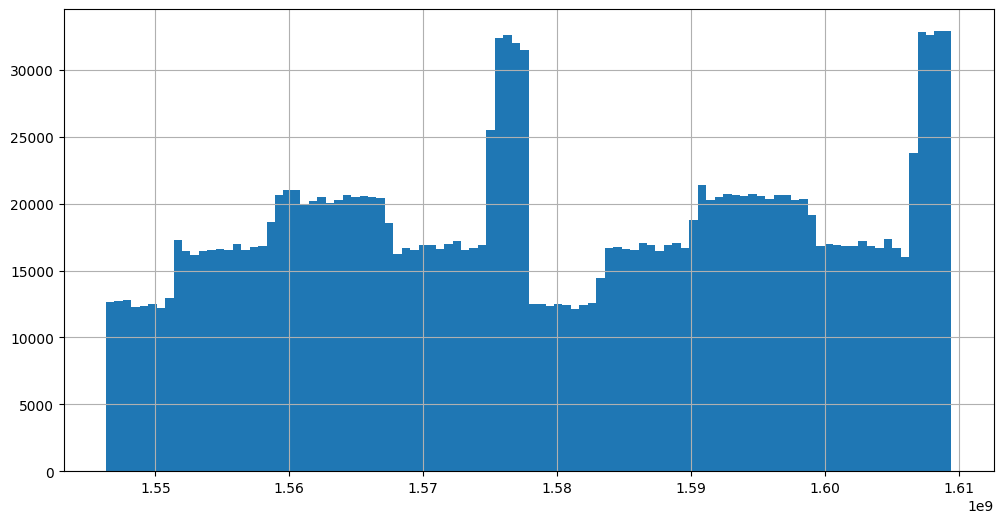

cc_num


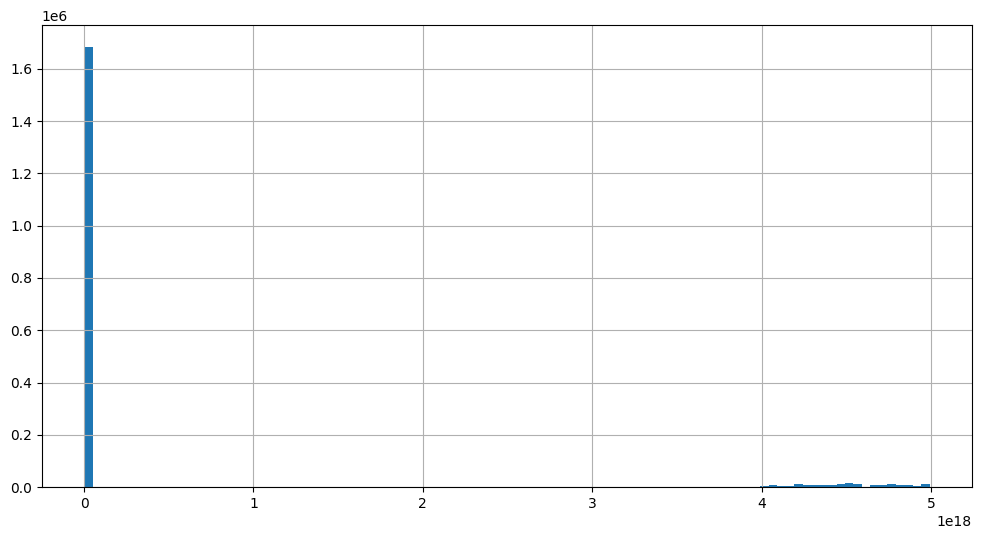

amt


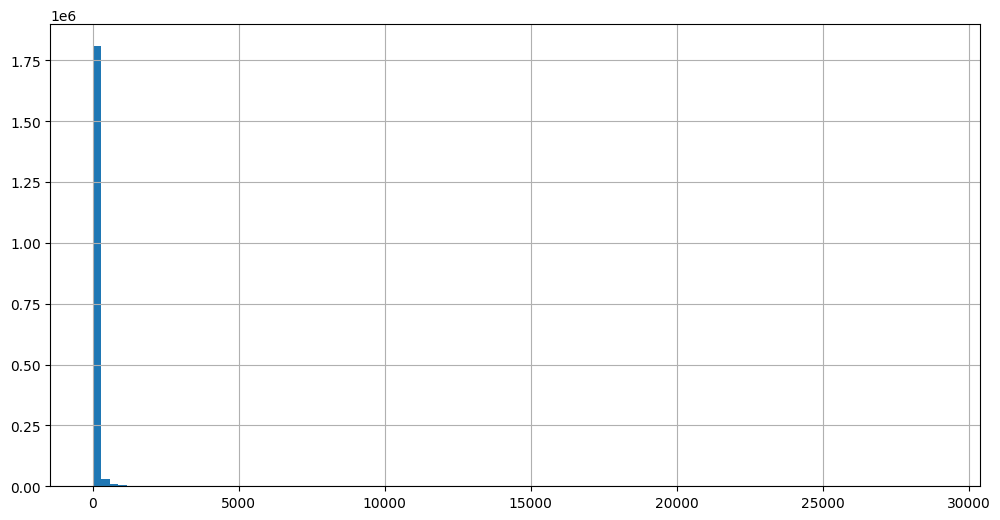

zip


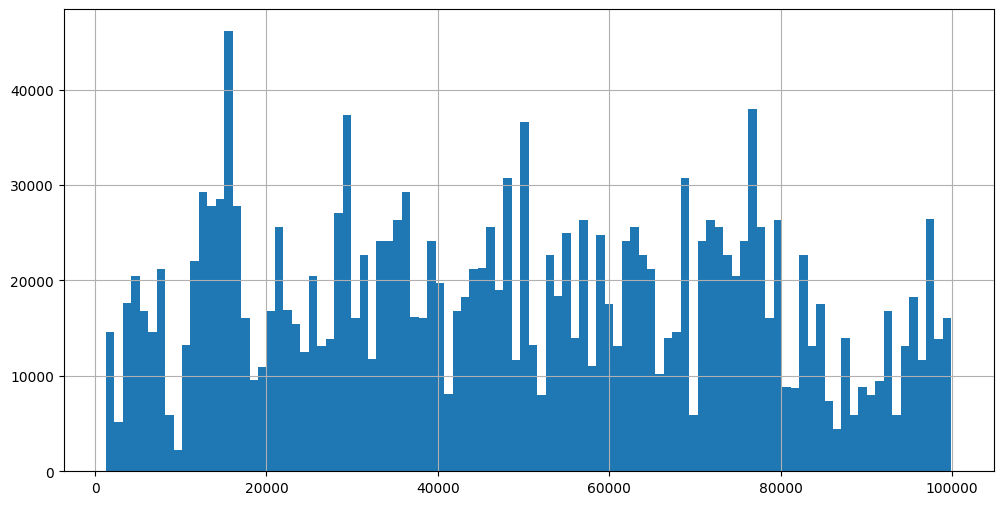

lat


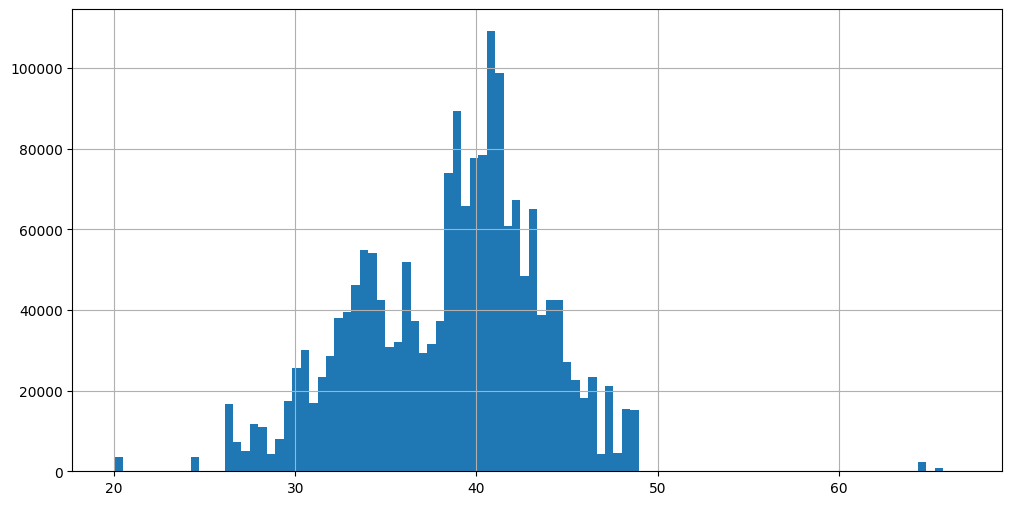

long


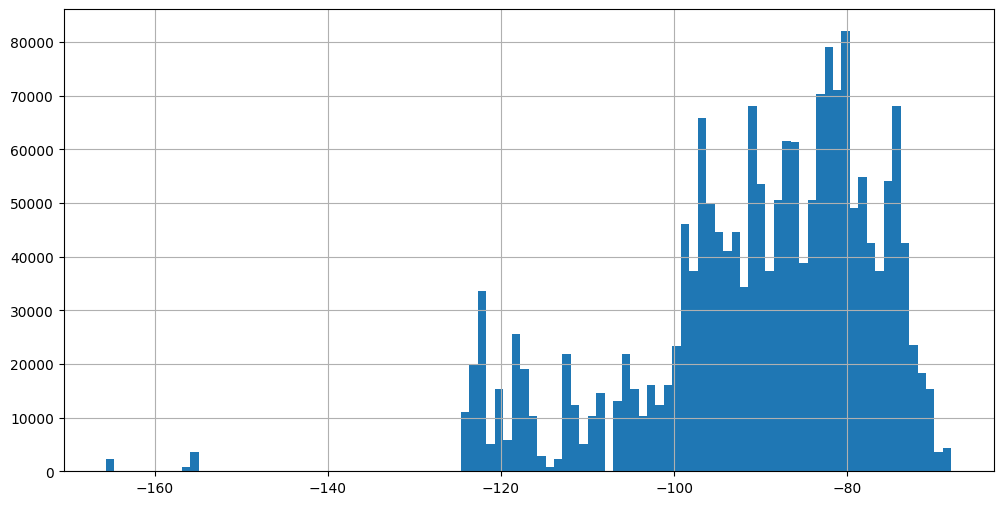

city_pop


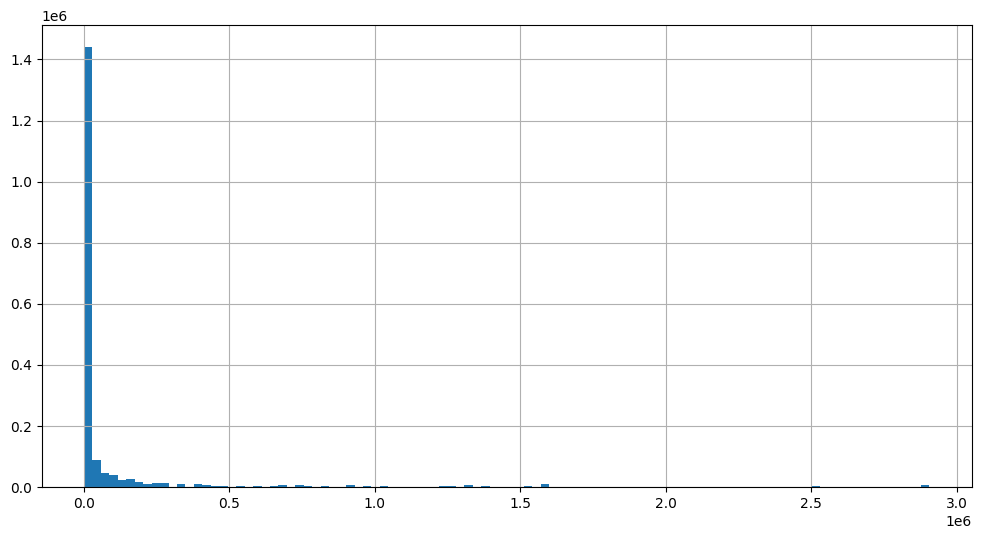

unix_time


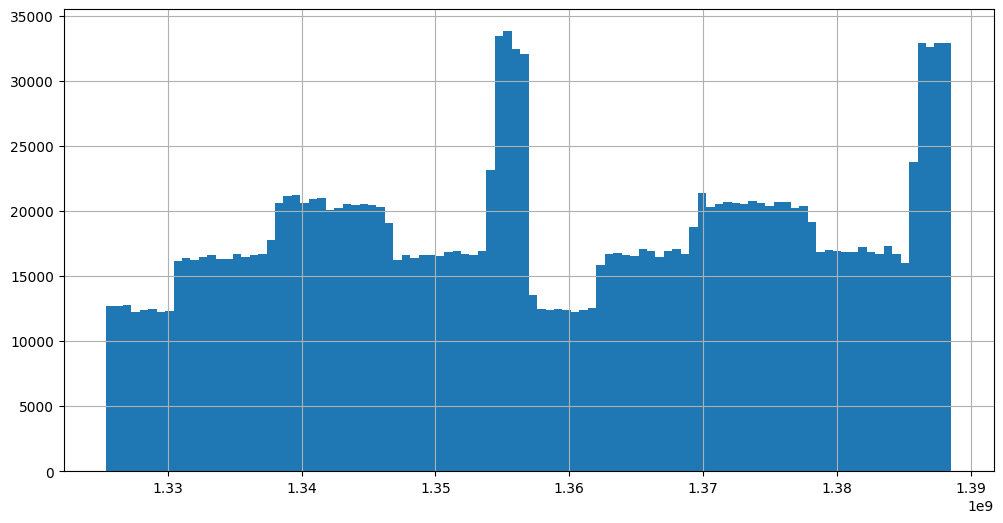

merch_lat


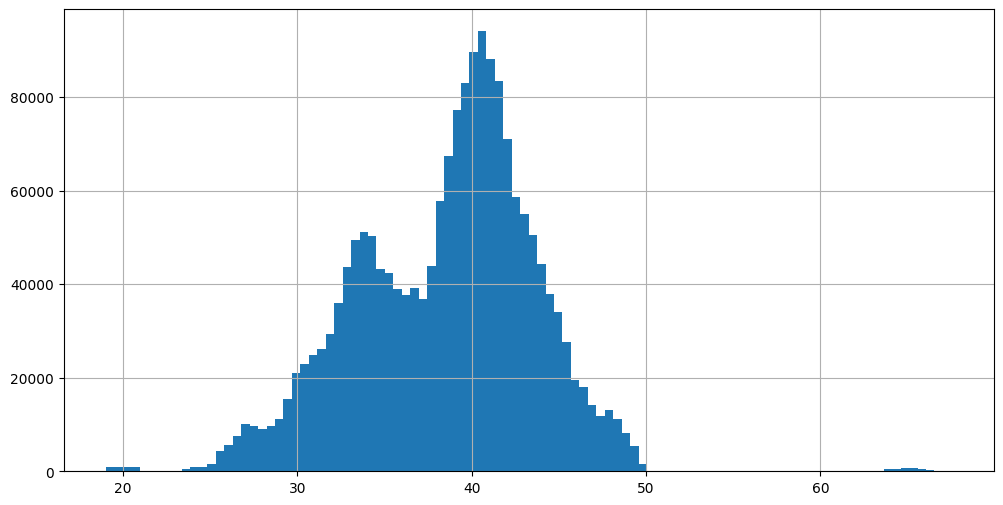

merch_long


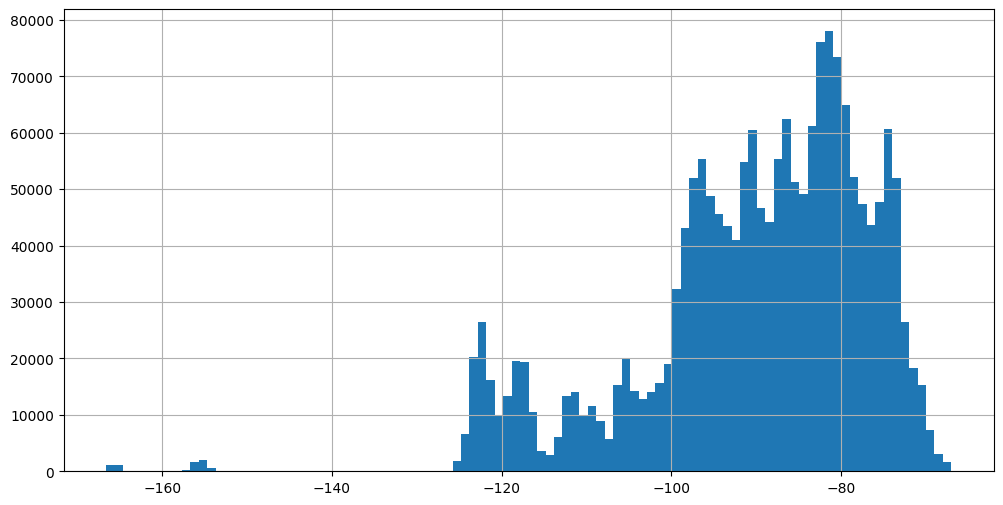

In [ ]:
# Print out a histogram for each column
# Set a bin size, can be changed as necessary
bin_size = 100
cols_to_print = ['trans_date_trans_time_unix_time', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

for column in cols_to_print:
  print(column)
  fraud_df[column].hist(bins=bin_size, figsize=(12,6))
  plt.show()

In [ ]:
# Create two subsets from the dataframe, one that only has rows that had no frauds, one that only had frauds
valid = fraud_df[fraud_df['is_fraud'] == 0][fraud_df.columns[:-1]]
fraud = fraud_df[fraud_df['is_fraud'] == 1][fraud_df.columns[:-1]]

trans_date_trans_time_unix_time


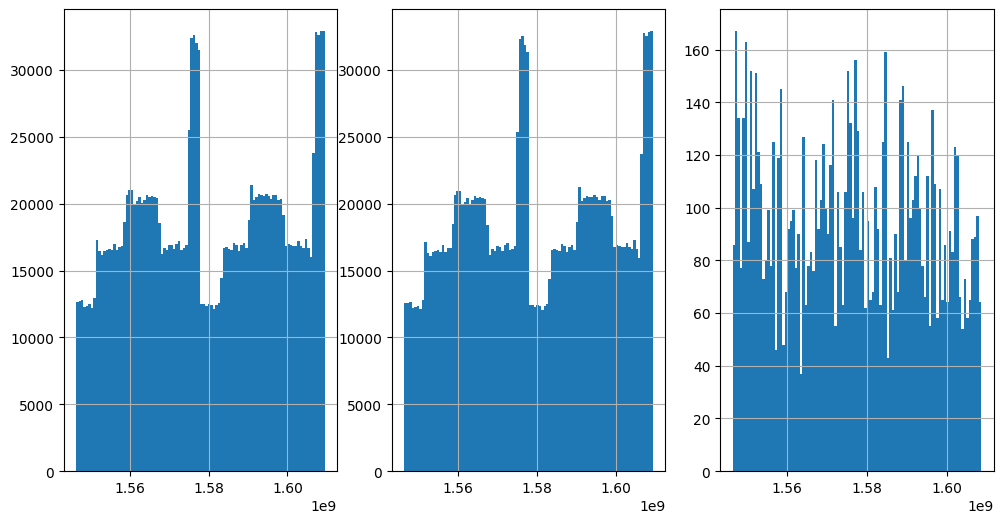

cc_num


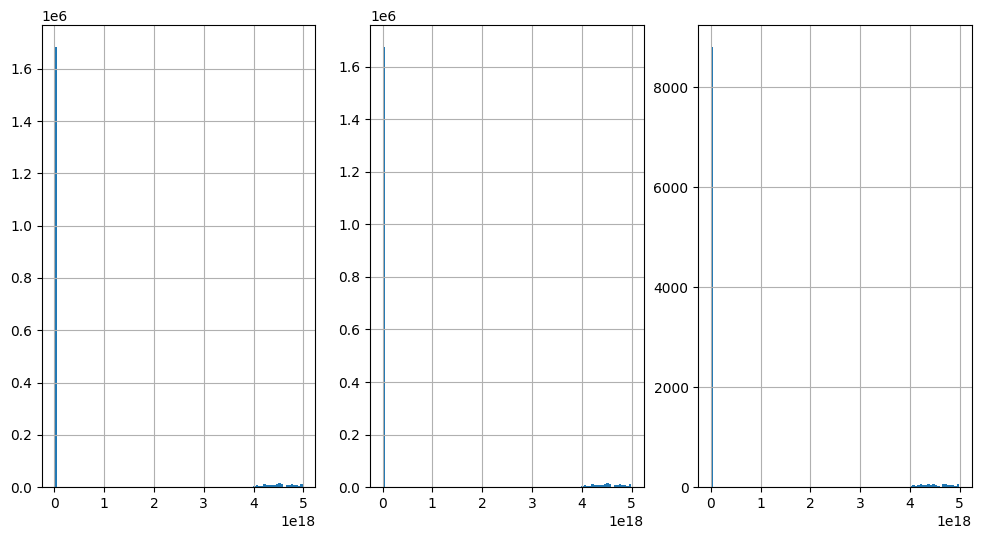

amt


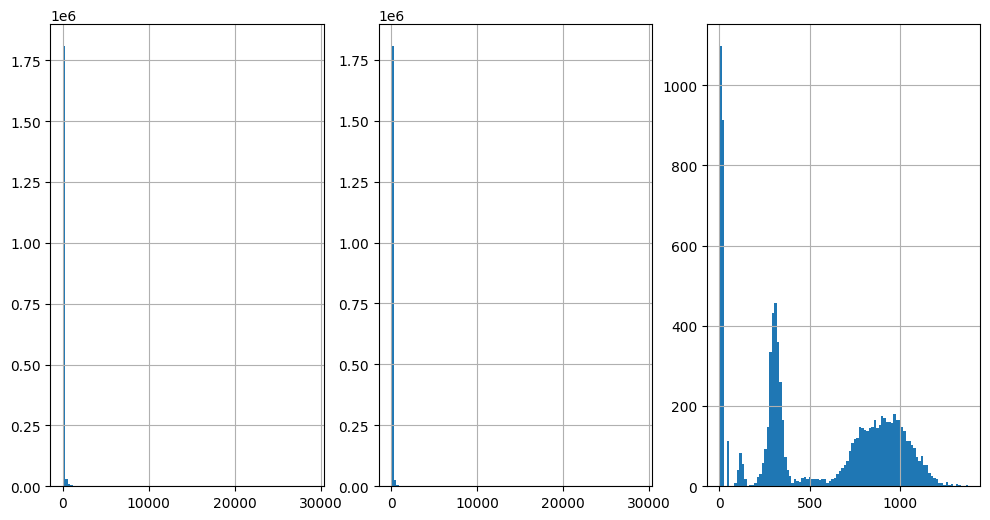

zip


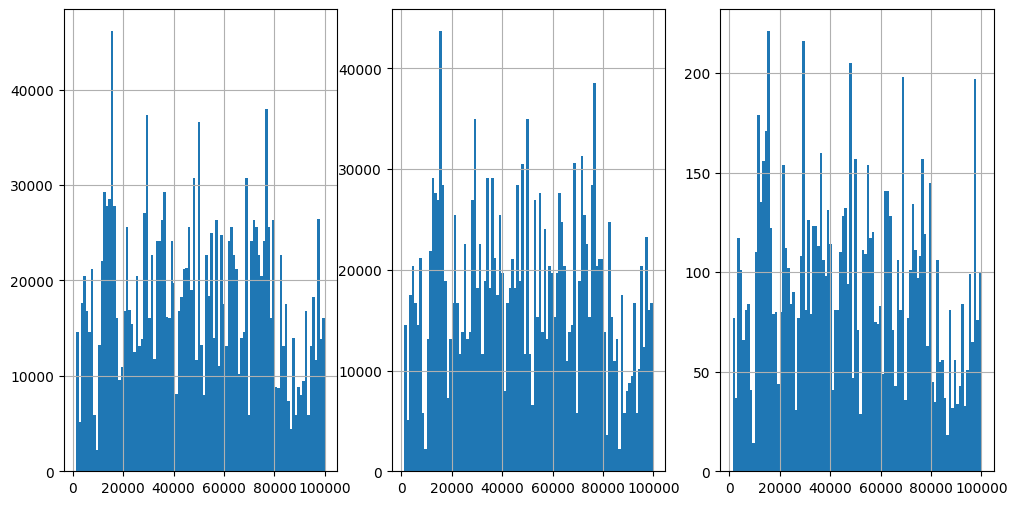

lat


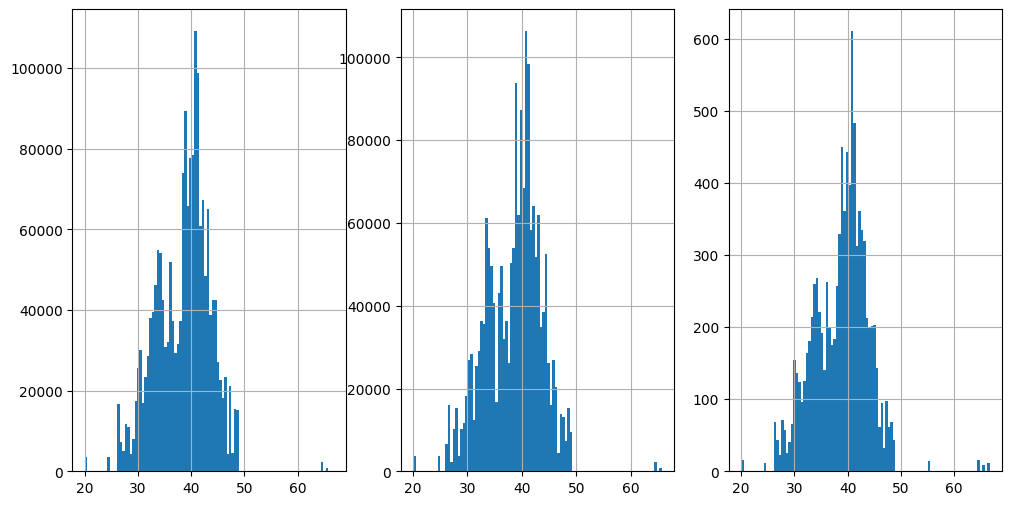

long


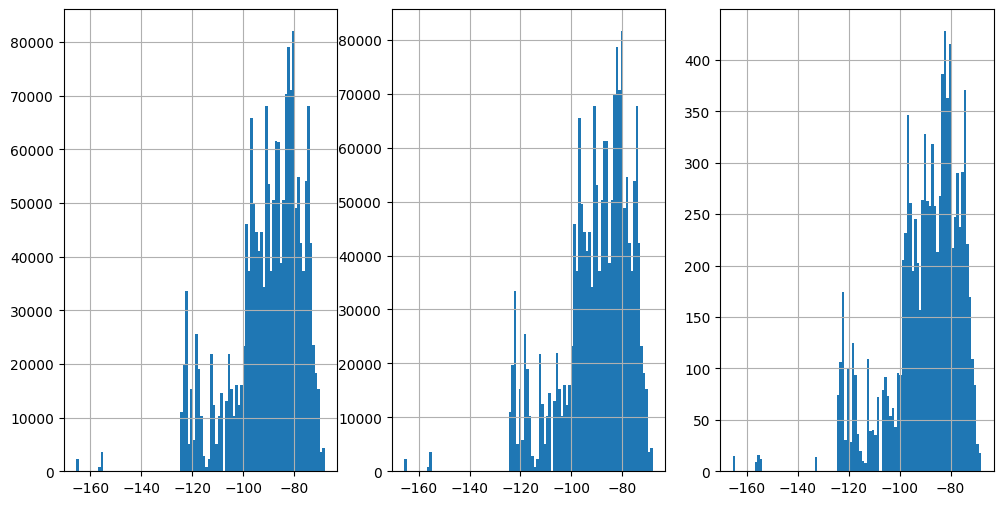

city_pop


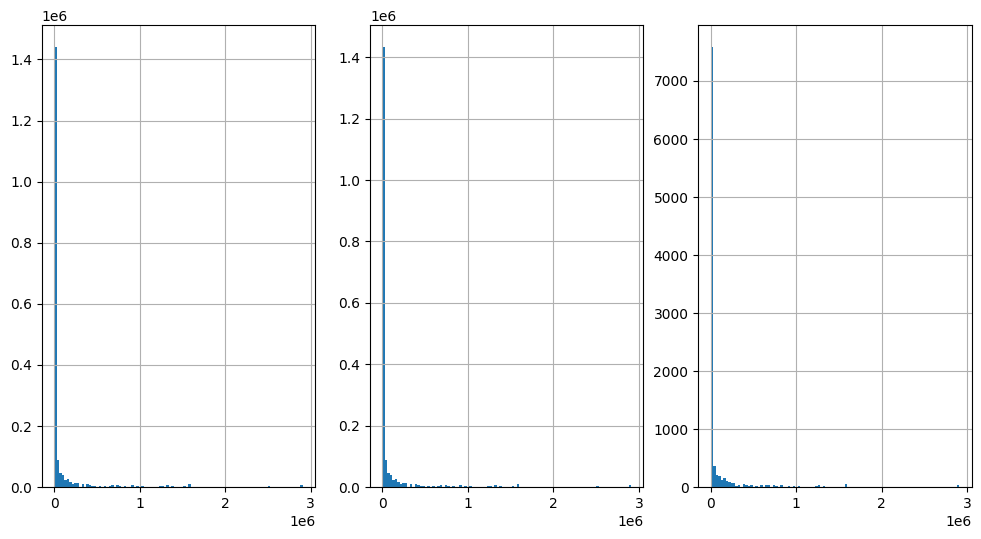

unix_time


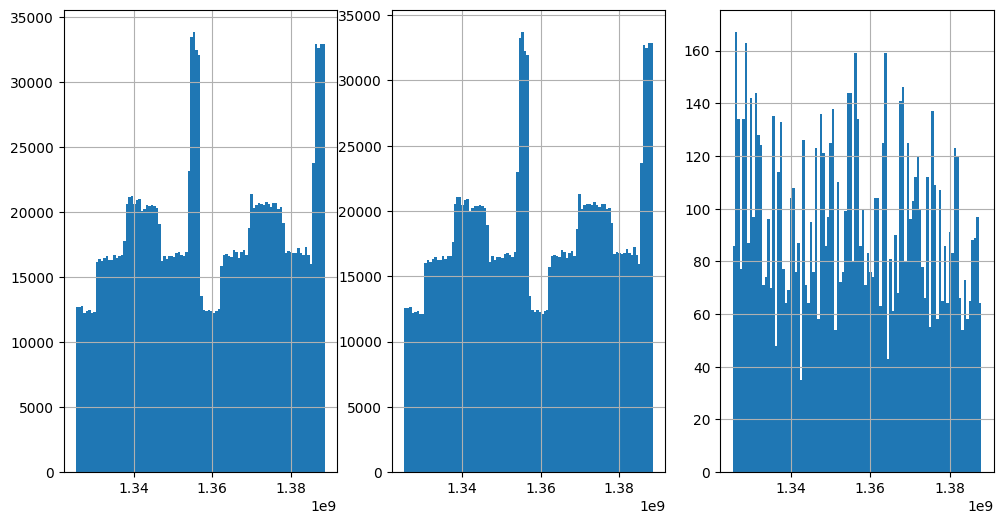

merch_lat


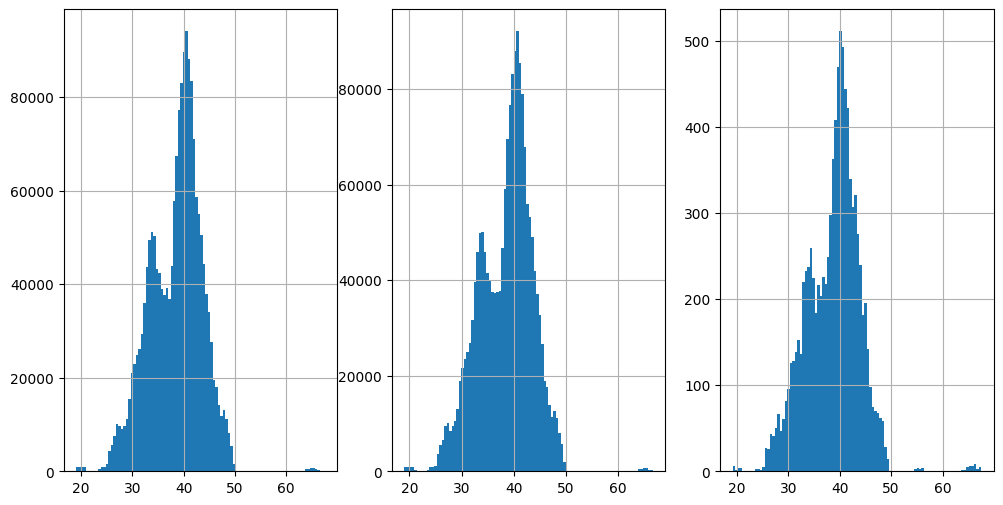

merch_long


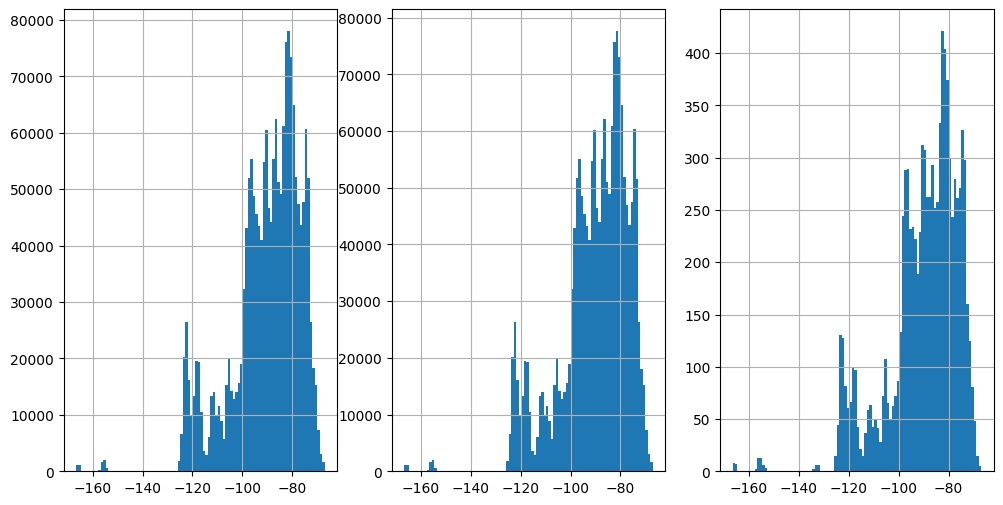

In [ ]:
# Print out histograms side-by-side to compare distributions
for column in cols_to_print:
  fig, axes = plt.subplots(1, 3)
  print(column)
  fraud_df[column].hist(bins=bin_size, ax=axes[0], figsize=(12,6), label='total')
  valid[column].hist(bins=bin_size, ax=axes[1], figsize=(12,6), label='valid')
  fraud[column].hist(bins=bin_size, ax=axes[2], figsize=(12,6), label='fraud')
  plt.show()

In [ ]:
# Create a correlation matrix, using Kendall-Tau method since data doesn't follow normal distribution
fraud_corr = fraud_df.corr(method='kendall', numeric_only=True)
fraud_corr

,trans_date_trans_time_unix_time,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
trans_date_trans_time_unix_time,1.000000,0.000811,-0.000700,0.000743,0.000590,-0.000766,-0.001937,0.999999,0.000594,-0.000764,-0.010846
cc_num,0.000811,1.000000,-0.000577,0.009304,-0.001349,-0.009059,0.032856,0.000811,-0.001821,-0.008898,-0.001175
amt,-0.000700,-0.000577,1.000000,0.000833,0.008652,-0.000237,-0.015874,-0.000700,0.008596,-0.000154,0.068072
zip,0.000743,0.009304,0.000833,1.000000,-0.127623,-0.829748,-0.026995,0.000743,-0.125903,-0.825227,-0.001968
lat,0.000590,-0.001349,0.008652,-0.127623,1.000000,0.085186,-0.176595,0.000590,0.919641,0.083767,0.001803
long,-0.000766,-0.009059,-0.000237,-0.829748,0.085186,1.000000,0.060360,-0.000766,0.084231,0.965916,0.001877
city_pop,-0.001937,0.032856,-0.015874,-0.026995,-0.176595,0.060360,1.000000,-0.001937,-0.175771,0.059808,0.001609
unix_time,0.999999,0.000811,-0.000700,0.000743,0.000590,-0.000766,-0.001937,1.000000,0.000594,-0.000764,-0.010846
merch_lat,0.000594,-0.001821,0.008596,-0.125903,0.919641,0.084231,-0.175771,0.000594,1.000000,0.082901,0.001688
merch_long,-0.000764,-0.008898,-0.000154,-0.825227,0.083767,0.965916,0.059808,-0.000764,0.082901,1.000000,0.001848


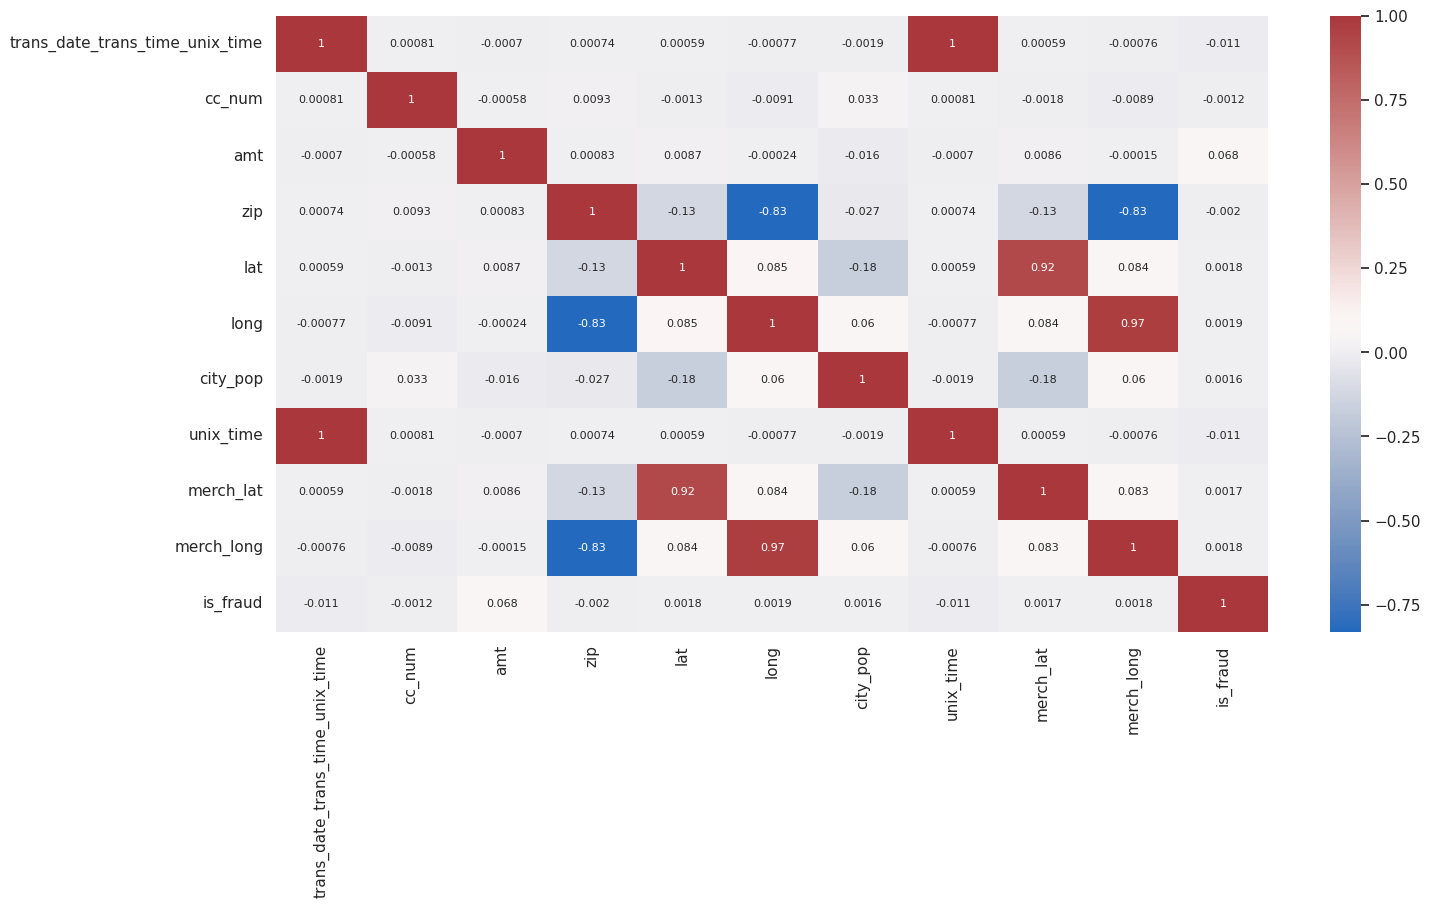

In [ ]:
# Display a heatmap of the correlation matrix
sns.set(rc={"figure.figsize":(16, 8)})
sns.heatmap(fraud_corr, annot=True, annot_kws={'size': 8}, cmap='vlag')
plt.show()